# Vizualizace dat žebříčků ČSFD
Autor: Jiří Čech

## README
Tento Jupyter Notebook je univerzální pro všechny žánry. Stačí v řádku `df = pd.read_json("results/zanr.json")` vyměnit `zanr.json` soubor za požadovaný žánr. Například 
`df = pd.read_json("results/sci_fi.json")`.

Pak je nutné spustit všechny bloky. Záložka `Cell->Run All`.

Spuštění ověřeno u:
- Distribuce `Anaconda 2021.05`

## Načtení nascrapovaných dat z ČSFD

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

df = pd.read_json("results/sci_fi.json")
df

,title,genres,origin,year,rating_value,rating_count,review_count,based_on,directors,scenarists,actors,musicians,producers,position
0,Terminátor 2: Den zúčtování,"[Akční, Sci-Fi, Thriller]","[USA, Francie]",1991,90.817075,78010,1859,[],[James Cameron],"[James Cameron, William Wisher Jr.]","[Arnold Schwarzenegger, Linda Hamilton, Edward...",[Brad Fiedel],[James Cameron],1
1,The Matrix,"[Akční, Sci-Fi]",[USA],1999,90.137769,103289,2141,[],"[Lilly Wachowski, Lana Wachowski]","[Lilly Wachowski, Lana Wachowski]","[Keanu Reeves, Laurence Fishburne, Carrie-Anne...",[Don Davis],[Joel Silver],2
2,Vetřelec,"[Horor, Sci-Fi]","[USA, Velká Británie]",1979,89.606542,68114,1726,[],[Ridley Scott],[Dan O'Bannon],"[Sigourney Weaver, Tom Skerritt, Veronica Cart...",[Jerry Goldsmith],"[Walter Hill, David Giler, Gordon Carroll]",3
3,Vetřelci,"[Sci-Fi, Thriller, Akční, Dobrodružný, Horor]","[USA, Velká Británie]",1986,89.540886,57110,1515,[],[James Cameron],[James Cameron],"[Sigourney Weaver, Carrie Henn, Michael Biehn,...",[James Horner],[Gale Anne Hurd],4
4,Star Wars: Epizoda V - Impérium vrací úder,"[Sci-Fi, Dobrodružný, Fantasy, Akční]",[USA],1980,89.018155,65326,1046,[],[Irvin Kershner],"[Leigh Brackett, Lawrence Kasdan]","[Mark Hamill, Harrison Ford, Carrie Fisher, Bi...",[John Williams],[Gary Kurtz],5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Heavy Metal,"[Animovaný, Sci-Fi, Fantasy, Horor]","[Kanada, USA]",1981,72.879534,2233,161,[],[Gerald Potterton],"[Daniel Goldberg, Len Blum]","[Harold Ramis, Eugene Levy, John Candy, Joe Fl...",[Elmer Bernstein],[Ivan Reitman],296
296,Them!,"[Sci-Fi, Horor]",[USA],1954,73.562232,466,84,[],[Gordon Douglas],"[Ted Sherdeman, Russell S. Hughes]","[James Whitmore, Edmund Gwenn, Joan Weldon, Ja...",[Bronislau Kaper],[David Weisbart],297
297,Můj nepřítel,"[Sci-Fi, Drama, Dobrodružný]",[USA],1985,72.785941,3471,186,[],[Wolfgang Petersen],[Edward Khmara],"[Dennis Quaid, Louis Gossett Jr., Brion James,...",[Maurice Jarre],[Stephen J. Friedman],298
298,Frankensteinova kletba,"[Sci-Fi, Horor]",[Velká Británie],1957,73.974359,312,45,[Mary Shelley (kniha)],[Terence Fisher],[Jimmy Sangster],"[Peter Cushing, Hazel Court, Robert Urquhart, ...",[James Bernard],[Anthony Hinds],299


## Kontrola atributů a počtu záznamů

In [260]:
df_count = df.count()

print('All attributes with number of records:\n')
print(df_count)

All attributes with number of records:

title           300
genres          300
origin          300
year            300
rating_value    300
rating_count    300
review_count    300
based_on        300
directors       300
scenarists      300
actors          300
musicians       300
producers       300
position        300
dtype: int64


## Vytvoření polí pro grafy

In [261]:
based_on = []
genres = []
origin = []
year = []
directors = []
scenarists = []
actors = []
musicians = []
producers = []

for column_name, item in df.iterrows():
    based_on = based_on + item['based_on']
    genres = genres + item['genres']
    year.append(item['year'])
    directors = directors + item['directors']
    scenarists = scenarists + item['scenarists']
    actors = actors + item['actors']
    musicians = musicians + item['musicians']
    producers = producers + item['producers']
    origin = origin + item['origin']

## Filmová předloha

<BarContainer object of 7 artists>

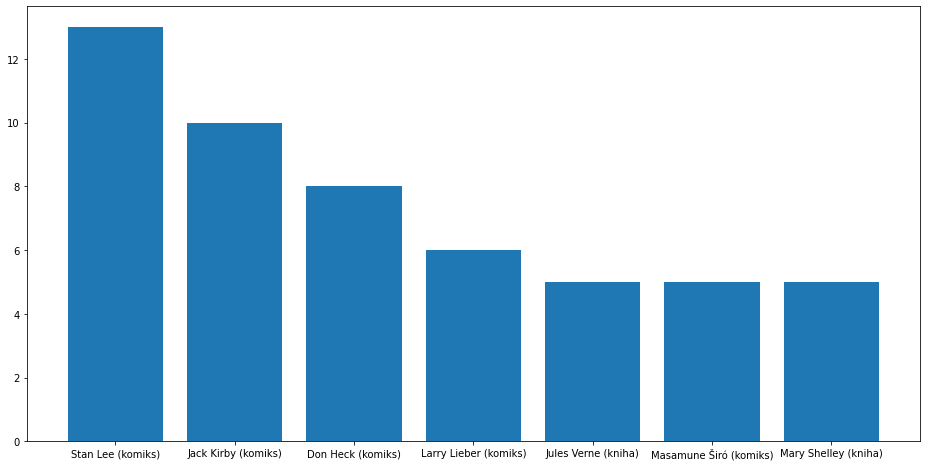

In [262]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(based_on).most_common(7)]
y = [x[1] for x in Counter(based_on).most_common(7)]

plt.bar(x, y)

## Související žánry

<BarContainer object of 11 artists>

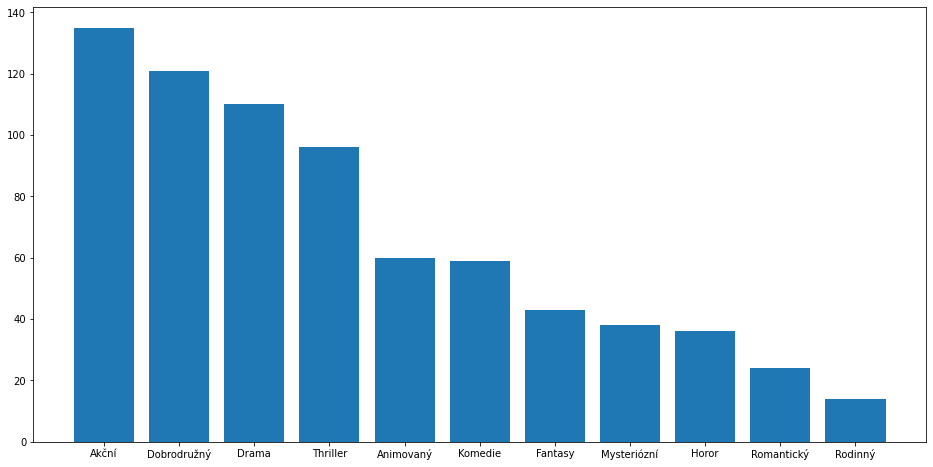

In [263]:
plt.figure(figsize=(16,8))
removed_genre = Counter(genres).most_common(12)
removed_genre.pop(0)

x = [x[0] for x in removed_genre]
y = [x[1] for x in removed_genre]

plt.bar(x, y)

## Země původu

<BarContainer object of 7 artists>

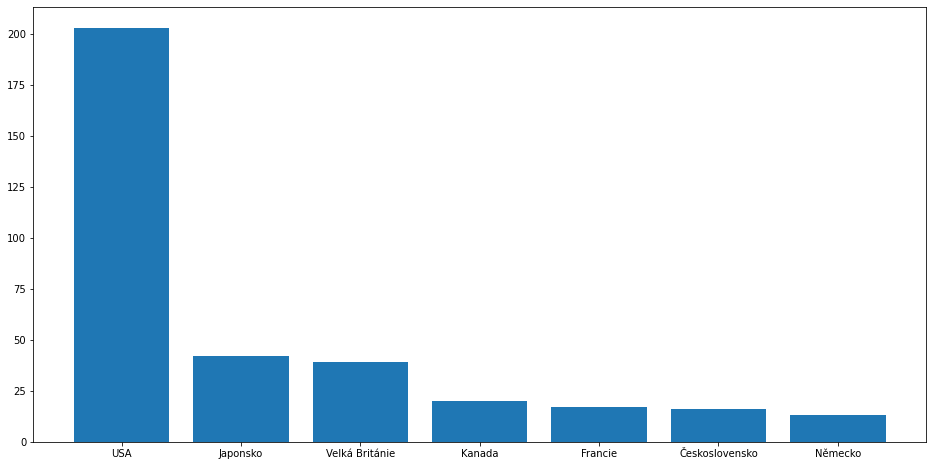

In [264]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(origin).most_common(7)]
y = [x[1] for x in Counter(origin).most_common(7)]

plt.bar(x, y)

## Vývoj počtu filmů v čase

<BarContainer object of 70 artists>

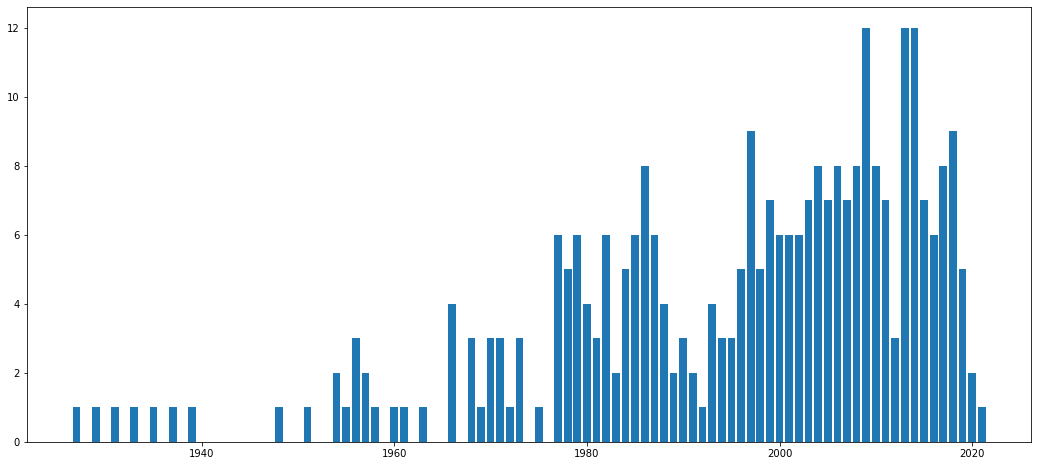

In [265]:
plt.figure(figsize=(18,8))

x = [x[0] for x in Counter(year).most_common()]
y = [x[1] for x in Counter(year).most_common()]

plt.bar(x, y)

## Režisér

<BarContainer object of 8 artists>

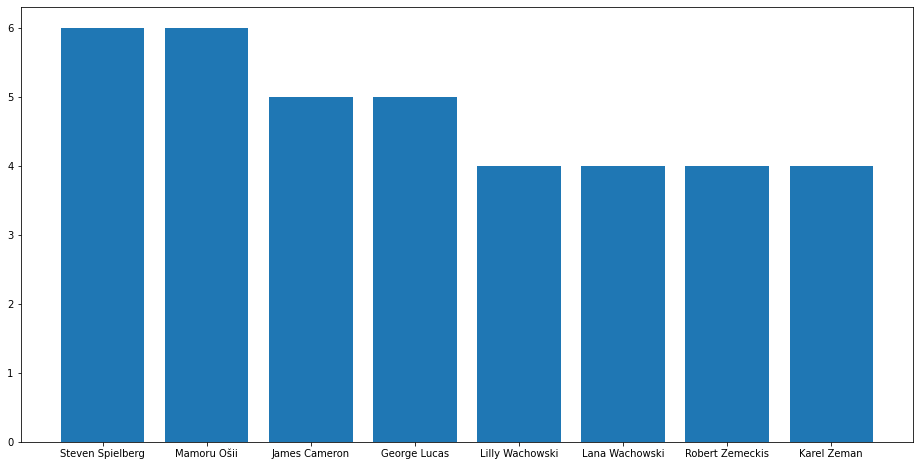

In [266]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(directors).most_common(8)]
y = [x[1] for x in Counter(directors).most_common(8)]

plt.bar(x, y)

## Scénarista

<BarContainer object of 8 artists>

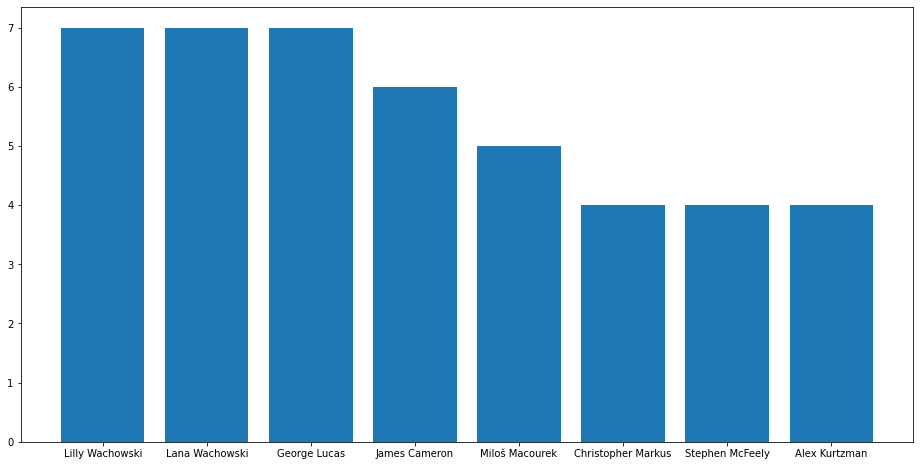

In [267]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(scenarists).most_common(8)]
y = [x[1] for x in Counter(scenarists).most_common(8)]

plt.bar(x, y)

## Herec

<BarContainer object of 8 artists>

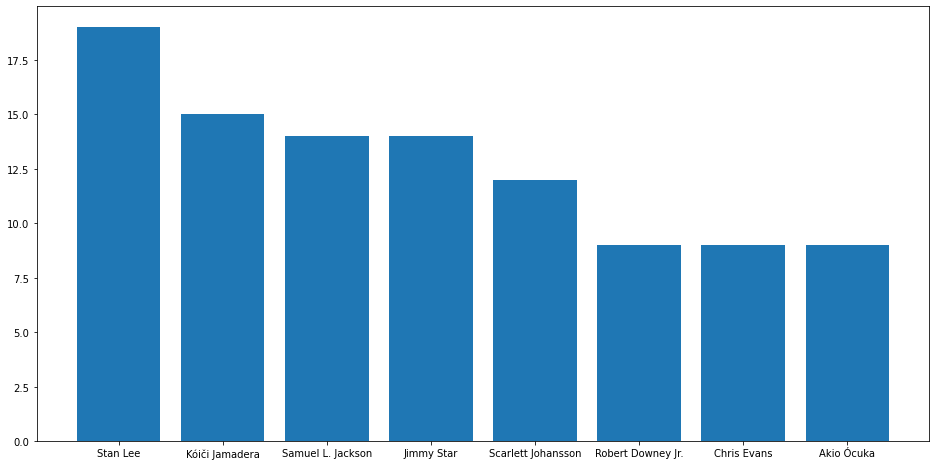

In [268]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(actors).most_common(8)]
y = [x[1] for x in Counter(actors).most_common(8)]

plt.bar(x, y)

## Hudba

<BarContainer object of 8 artists>

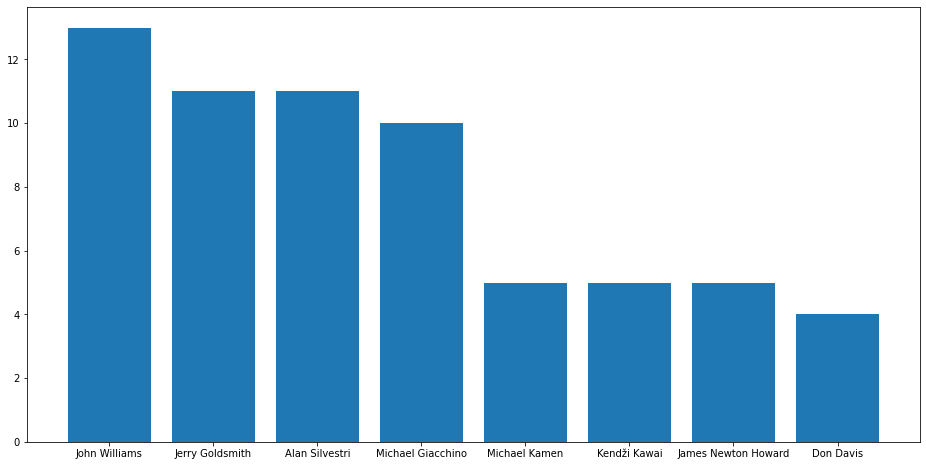

In [269]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(musicians).most_common(8)]
y = [x[1] for x in Counter(musicians).most_common(8)]

plt.bar(x, y)

## Produkce

<BarContainer object of 8 artists>

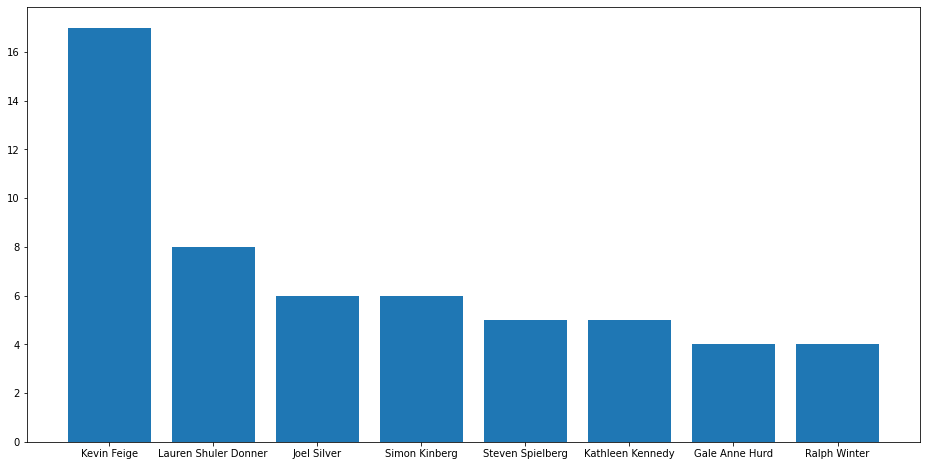

In [270]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(producers).most_common(8)]
y = [x[1] for x in Counter(producers).most_common(8)]

plt.bar(x, y)